In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
Y_train = train_data["Survived"]
#pandas配列
features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# NumPy配列に変換
X_train_array = X_train.to_numpy().astype(np.float32)
Y_train_array = Y_train.to_numpy().astype(np.float32)
X_test_array = X_test.to_numpy().astype(np.float32)

print(X_train_array)


[[3. 1. 0. 0. 1.]
 [1. 1. 0. 1. 0.]
 [3. 0. 0. 1. 0.]
 ...
 [3. 1. 2. 1. 0.]
 [1. 0. 0. 0. 1.]
 [3. 0. 0. 0. 1.]]


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Input(shape=(5,)))  # 入力層を最初に追加
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

#モデルの構築
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# 早期停止のコールバックを追加
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
#学習の実行
history = model.fit(X_train_array,Y_train_array,batch_size = 1000,epochs=180,callbacks=[early_stopping])



2024-07-28 04:26:00.842983: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 04:26:00.843123: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 04:26:01.002193: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/180
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5993 - loss: 0.8961
Epoch 2/180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4983 - loss: 0.9256
Epoch 3/180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7093 - loss: 0.6025
Epoch 4/180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7205 - loss: 0.5909
Epoch 5/180


/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7318 - loss: 0.5901
Epoch 6/180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7710 - loss: 0.5455
Epoch 7/180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7935 - loss: 0.4984
Epoch 8/180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7856 - loss: 0.5155
Epoch 9/180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7733 - loss: 0.5334
Epoch 10/180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7890 - loss: 0.5077
Epoch 11/180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7856 - loss: 0.5007
Epoch 12/180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7890 - loss: 0.4828
Epoch 13/180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7924 - loss: 0.4783
Epoch 14/180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7856 - loss: 0.4920
Epoch 15/180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7868 - loss: 0.4825
Epoch 16/180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7834 - loss: 0.48

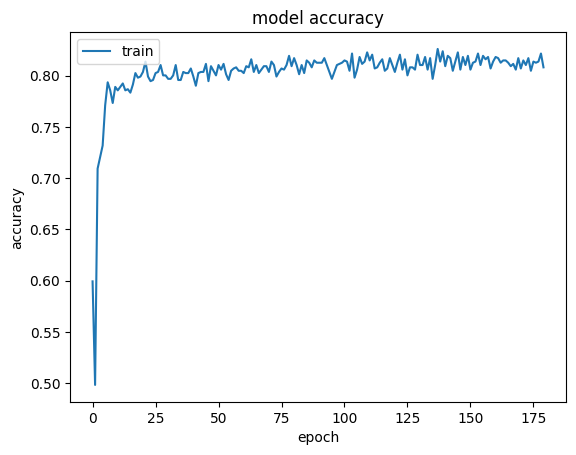

In [6]:
from matplotlib import pyplot
#エポック毎のaccuracy結果グラフ化
pyplot.plot(history.history['accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()

In [7]:
import numpy as np
predictions = model.predict(X_test_array)
predictions = np.round(predictions).astype(int)
# PassengerIdをNumPy配列に変換
passenger_ids = test_data['PassengerId'].to_numpy()
# 予測結果とPassengerIdを結合
output_array = np.column_stack((passenger_ids, predictions))

# NumPy配列をCSVファイルに保存
np.savetxt('submission.csv', output_array, delimiter=',', fmt='%d', header='PassengerId,Survived', comments='')


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
